![](https://i.imgur.com/MUGUenE.png)


![](https://www.researchgate.net/publication/341286302/figure/fig1/AS:893971362508800@1590150790528/State-wise-distribution-of-positive-coronavirus-disease-cases-displayed-on-an-Indian.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_19=pd.read_csv("C:\\Users\\ANIL YADAV\\OneDrive\\Desktop\\covid_19_india.csv")

In [3]:
covid_19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:
covid_19.shape

(18110, 9)

In [6]:
covid_19.drop(["Sno",'ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [7]:
covid_19.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


In [8]:
covid_19['State/UnionTerritory'].unique(),covid_19['State/UnionTerritory'].nunique()

(array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
        'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
        'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
        'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
        'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura', 'Nagaland', 'Meghalaya',
        'Dadra and Nagar Haveli and Daman and Diu',
        'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
        'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
        'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
        'Maharashtra***'], dtype=object),
 46)

In [9]:
"Correcting spelling mistakes or impurities"

state_correction_dict = {
    'Bihar****':'Bihar',
    'Dadra and Nagar Haveli':'Dadra and Nagar Haveli and Daman and Diu',
    'Madhya Pradesh***':'Madhya Pradesh',
    'Maharashtra***':'Maharashtra',
    'Karanataka':'Karnataka'
}

In [10]:
def state_correction(state):
    try:
        return state_correction_dict[state]
    except:
        return state
    
covid_19['State/UnionTerritory'] = covid_19['State/UnionTerritory'].apply(state_correction)
covid_19['State/UnionTerritory'].nunique()

41

In [11]:
from datetime import datetime

In [12]:
covid_19['Date']=pd.to_datetime(covid_19['Date'],format='%Y-%m-%d')

In [13]:
covid_19.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


In [14]:
#Active_case
covid_19['Active_case']=covid_19['Confirmed']-(covid_19['Cured']+covid_19['Deaths'])

In [15]:
covid_19.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active_case
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,0,0,3,3


In [16]:
statewise=pd.pivot_table(covid_19,values=['Cured','Deaths','Confirmed'],index='State/UnionTerritory',aggfunc='max',margins=True)

In [17]:
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544
Dadra and Nagar Haveli and Daman and Diu,10654,10646,4


In [18]:
df_top_10 = covid_19.nlargest(10,['Active_case'])

In [19]:
df_top_10 

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active_case
14134,2021-04-23,8:00 AM,Maharashtra,3330747,62479,4094840,701614
14242,2021-04-26,8:00 AM,Maharashtra,3530060,64760,4295027,700207
14098,2021-04-22,8:00 AM,Maharashtra,3268449,61911,4027827,697467
14206,2021-04-25,8:00 AM,Maharashtra,3468610,63928,4228836,696298
14170,2021-04-24,8:00 AM,Maharashtra,3404792,63252,4161676,693632
14062,2021-04-21,8:00 AM,Maharashtra,3213464,61343,3960359,685552
14026,2021-04-20,8:00 AM,Maharashtra,3159240,60824,3898262,678198
14278,2021-04-27,8:00 AM,Maharashtra,3601796,65284,4343727,676647
14350,2021-04-29,8:00 AM,Maharashtra,3730729,67214,4473394,675451
14314,2021-04-28,8:00 AM,Maharashtra,3669548,66179,4410085,674358


In [20]:
df_top_10 = covid_19.groupby(['State/UnionTerritory'])['Active_case'].max().sort_values(ascending=False).reset_index()
df_top = df_top_10.nlargest(10,['Active_case'])
df_top

,State/UnionTerritory,Active_case
0,Maharashtra,701614
1,Karnataka,605515
2,Kerala,445692
3,Tamil Nadu,313048
4,Uttar Pradesh,310783
5,Rajasthan,212753
6,Andhra Pradesh,211554
7,Gujarat,148297
8,West Bengal,132181
9,Chhattisgarh,131245


In [38]:
df_top_death=covid_19.nlargest(10,['Deaths'])

In [39]:
df_top_10=covid_19.groupby(['State/UnionTerritory'])['Deaths'].max().sort_values(ascending=False).reset_index()

In [40]:
df_top_death=df_top_10.nlargest(10,['Deaths'])

In [41]:
df_top_death

,State/UnionTerritory,Deaths
0,Maharashtra,134201
1,Karnataka,36848
2,Tamil Nadu,34367
3,Delhi,25068
4,Uttar Pradesh,22775
5,West Bengal,18252
6,Kerala,18004
7,Punjab,16322
8,Andhra Pradesh,13564
9,Chhattisgarh,13544


In [42]:
#Finding recovery rate and deathrate

In [50]:
statewise['Recovary_rate']=statewise['Cured']*100/statewise['Confirmed']
statewise['Deathrate'] = statewise['Deaths']*100/statewise['Confirmed']
statewise=statewise.sort_values(by='Confirmed',ascending=False)
statewise.style.background_gradient(cmap='cubehelix')


,Confirmed,Cured,Deaths,Recovary_rate,Deathrate
State/UnionTerritory,,,,,
All,6363442,6159676,134201,96.797865,2.108937
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056
Delhi,1436852,1411280,25068,98.220276,1.744647


In [51]:
#top active case
top10_active_case=covid_19.groupby(by='State/UnionTerritory').max()[['Active_case','Date']].sort_values(by=['Active_case'],ascending=False).reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Maharashtra'),
  Text(1, 0, 'Karnataka'),
  Text(2, 0, 'Kerala'),
  Text(3, 0, 'Tamil Nadu'),
  Text(4, 0, 'Uttar Pradesh'),
  Text(5, 0, 'Rajasthan'),
  Text(6, 0, 'Andhra Pradesh'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'West Bengal'),
  Text(9, 0, 'Chhattisgarh')])

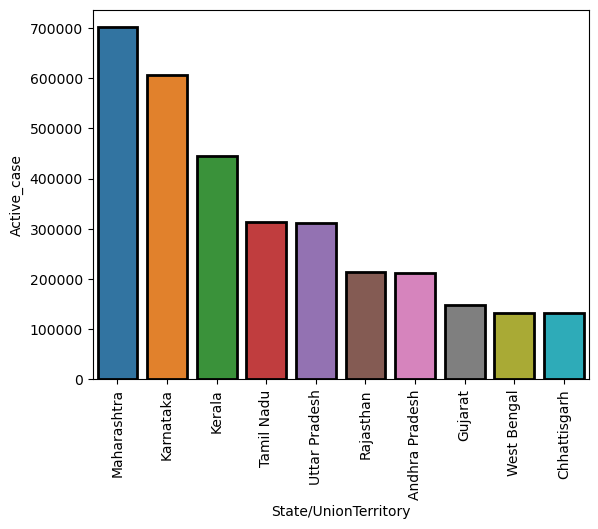

In [58]:
ax=sns.barplot(data=top10_active_case.iloc[:10],y="Active_case",x="State/UnionTerritory",linewidth=2,edgecolor='black')
plt.xticks(rotation = 90)

In [31]:
# top 10 state active case

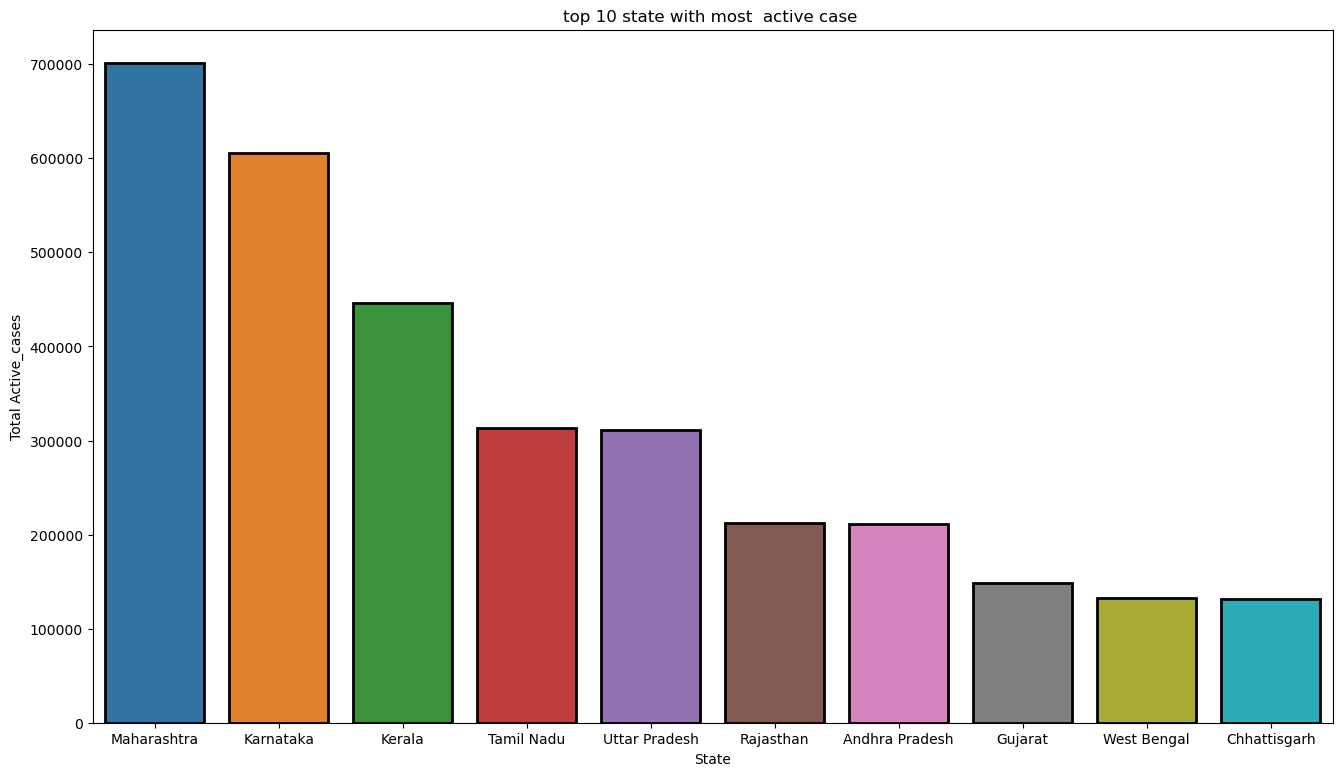

In [61]:
top_10_active_case=covid_19.groupby(by='State/UnionTerritory').max()[['Active_case','Date']].sort_values(by=['Active_case'],ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title("top 10 state with most  active case ")
ax=sns.barplot(data= top_10_active_case.iloc[:10],y="Active_case",x="State/UnionTerritory",linewidth=2,edgecolor='black')
plt.xlabel('State')
plt.ylabel("Total Active_cases")
plt.show()


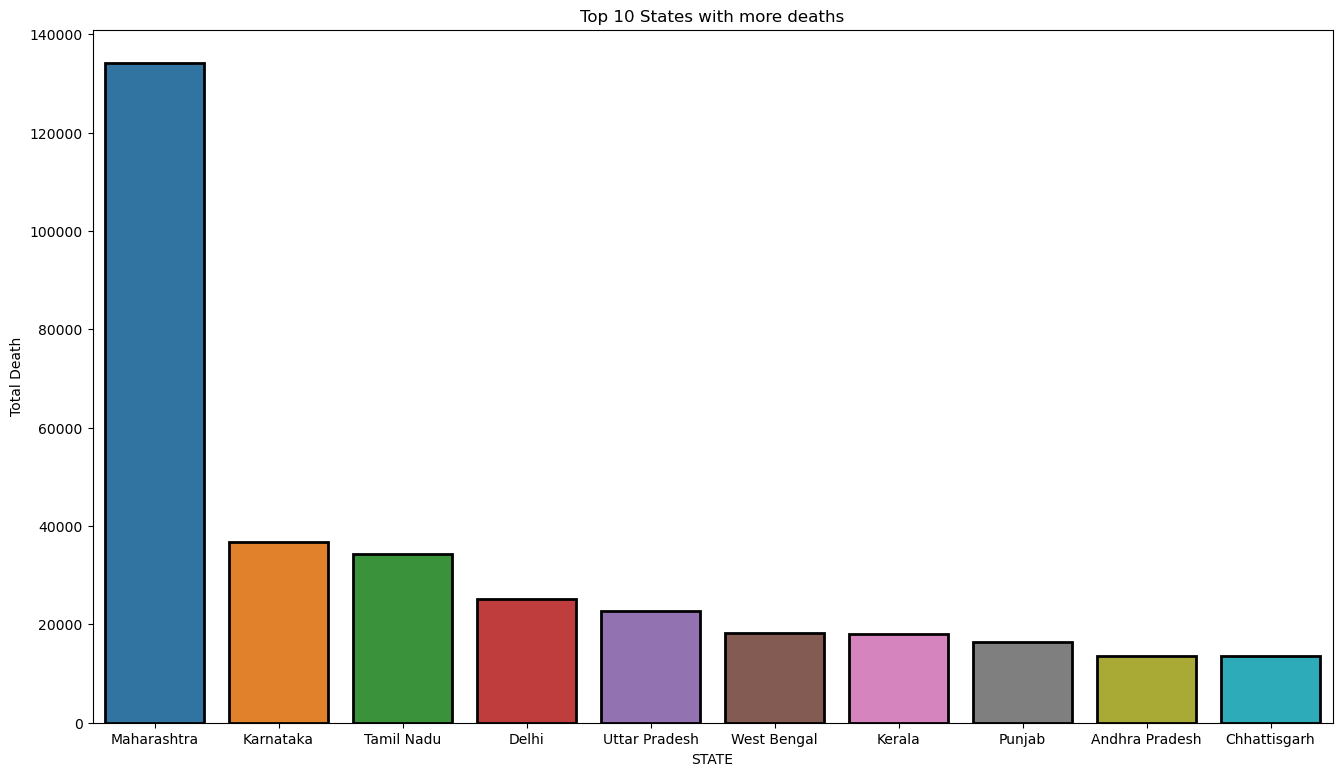

In [71]:
top_10_Deaths_case=covid_19.groupby(by='State/UnionTerritory').max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending=False).reset_index()
plt.figure(figsize=(16,9))
ax=sns.barplot(data=top_10_Deaths_case.iloc[:10],y='Deaths',x='State/UnionTerritory',linewidth=2,edgecolor="black")
plt.title("Top 10 States with more deaths")
plt.xlabel("STATE")
plt.ylabel("Total Death")
plt.show()

Text(0.5, 1.0, 'Top 5 Affected States')

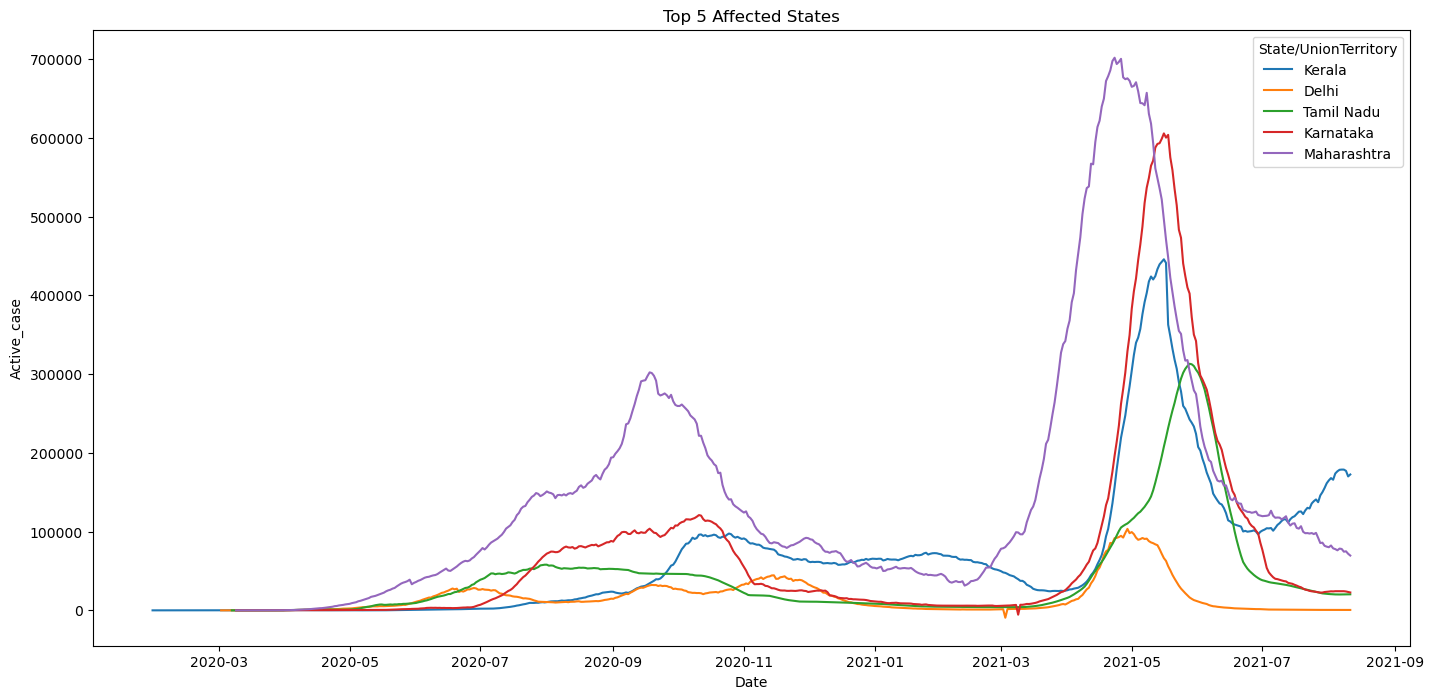

In [72]:
plt.figure(figsize=(17,8))
#ax=sns.lineplot(data=covid_19[covid_19['State/UnionTerritory'].isin(['Maharashtra','Kerala','Karnataka','Tamil Nadu','Delhi'])], X='Date',y='Active_case',hue='State/UnionTerritory')
import seaborn as sns

ax = sns.lineplot(data=covid_19[covid_19['State/UnionTerritory'].isin(['Maharashtra','Kerala','Karnataka','Tamil Nadu','Delhi'])], x='Date', y='Active_case', hue='State/UnionTerritory')
ax.set_title("Top 5 Affected States")


# VACCINATION

![](https://cdn.apollohospitals.com/dev-apollohospitals/2021/04/COVID-19-Vaccination-696x464-2.jpg)


In [73]:
vaccine=pd.read_csv("C:\\Users\\ANIL YADAV\\OneDrive\\Desktop\\covid_vaccine_statewise.csv")

In [74]:
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [75]:
vaccine.shape

(7845, 24)

In [76]:
vaccine.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [77]:
vaccine.rename(columns={ 'Updated On':'Vaccine_Date'}, inplace=True)

#student_df_1.rename(columns={"id": "ID"}, inplace=True)

In [78]:
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [79]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [80]:
vaccine.drop(['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1,inplace=True)

In [81]:
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [82]:
#male vs female
male=vaccine['Male(Individuals Vaccinated)'].sum()
female=vaccine['Female(Individuals Vaccinated)'].sum()
male,female

(7138698858.0, 6321628736.0)

In [83]:
import plotly.express as px
from plotly.subplots import make_subplots

In [86]:
px.pie(names=['Male','Female'],values=[male,female],title='Male and Female vaccination')

In [95]:
data=[male,female]

In [98]:
keys=['Male','Female']

([<matplotlib.patches.Wedge at 0x1ad3dad72e0>,
 [Text(-0.10472681424709744, 1.0950033307609863, 'Male'),
  Text(0.1047268142470973, -1.0950033307609863, 'Female')],
 [Text(-0.05712371686205314, 0.5972745440514471, '53%'),
  Text(0.057123716862053066, -0.5972745440514471, '47%')])

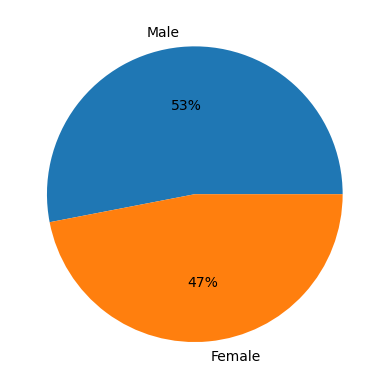

In [107]:
palette_color = sns.color_palette('dark')
plt.pie(data, labels=keys, autopct='%.0f%%')



In [87]:
vaccine_df=vaccine[vaccine['State']!='India']

In [108]:
vaccine_df.rename(columns = { 'Total Individuals Vaccinated':'Total'},inplace=True)

C:\Users\ANIL YADAV\AppData\Local\Temp\ipykernel_19256\3077146321.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
#max_vac=vaccine_df.groupby(by='State')['Total'].sum().sort_values(by=['Total'],ascending=False
max_vacc=vaccine_df.groupby(by='State').sum()[['Total']].sort_values(by=['Total'],ascending=False).iloc[:10].reset_index()

In [110]:
max_vacc

,State,Total
0,Maharashtra,1.403075e+09
1,Uttar Pradesh,1.200575e+09
2,Rajasthan,1.141163e+09
3,Gujarat,1.078261e+09
4,West Bengal,9.250227e+08
5,Karnataka,8.685235e+08
6,Madhya Pradesh,7.718640e+08
7,Bihar,6.608479e+08
8,Kerala,6.208252e+08
9,Andhra Pradesh,5.645911e+08


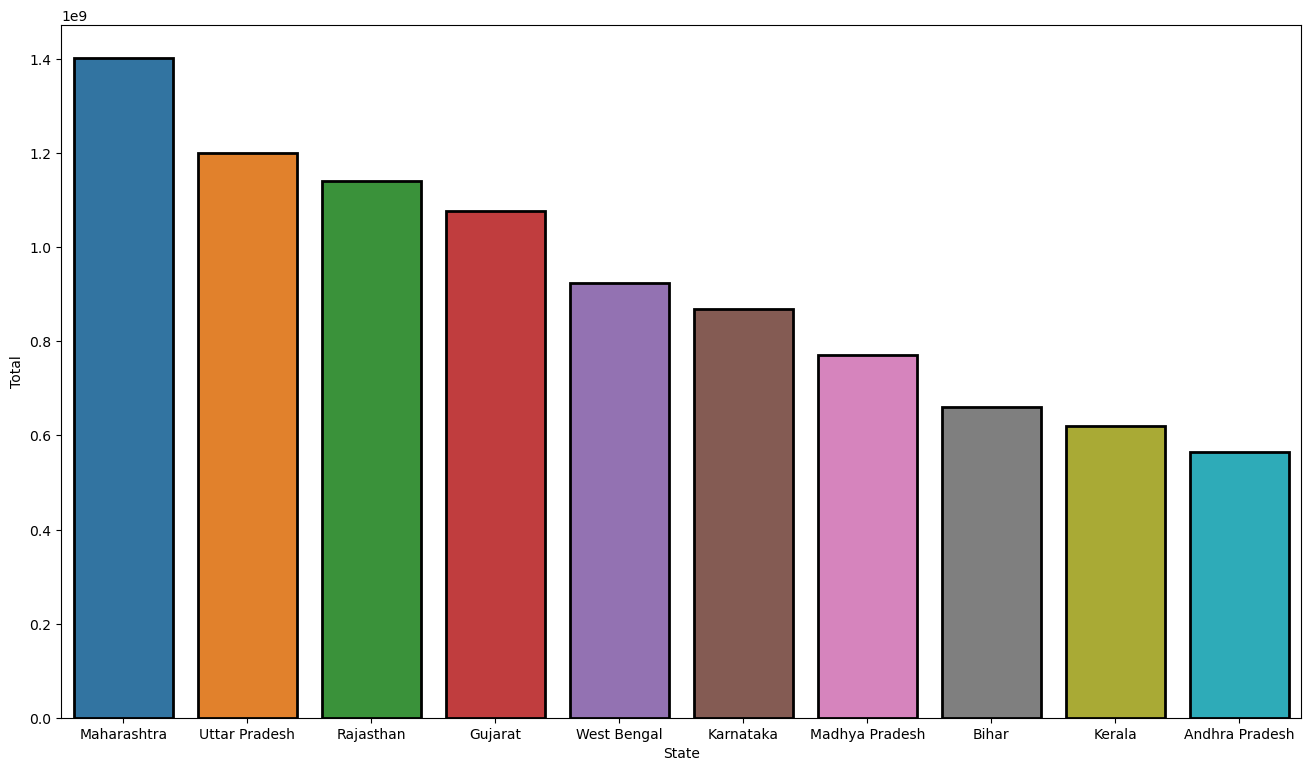

In [94]:
plt.figure(figsize=(16,9))
x=sns.barplot(data=max_va,y=max_vacc.Total,x=max_va.State,linewidth=2,edgecolor='black')